In [35]:
import numpy as np
from matplotlib import pyplot as plt

# par are lists containing [Etot,E0] in MeV
def Nev(par_e,par_ebar,par_x):
    import math
    import numpy as np

    # Estimates the parameters of the diffuse flux from the snr and emission parameters
    from snr import snr_yuksel
    J1,J2,J3=snr_yuksel(0,'integrals','avg')
    
    Ftot_e=J1*par_e[0]/par_e[1]
    Ftot_ebar=J1*par_ebar[0]/par_ebar[1]
    Ftot_x=J1*par_x[0]/par_x[1]

    E0e=par_e[1]*J2/J1
    E0ebar=par_ebar[1]*J2/J1
    E0x=par_x[1]*J2/J1

    A=(2+2.3)/(1+2.3)
    k=J3*J1/J2**2
    a=(2-k*A)/(k*A-1)

    from spectra import spectrum_garching
    f0=lambda E,Ftot,E0,a: spectrum_garching(E,Ftot*E0,E0,a)

    f0e=lambda E: f0(E,Ftot_e,E0e,a)
    f0ebar=lambda E: f0(E,Ftot_ebar,E0ebar,a)
    f0x=lambda E: f0(E,Ftot_x,E0x,a)

    from mix import mix_ad
    fe_mix_nh=mix_ad(f0e,f0ebar,f0x,'nu_e','nh')
    fe_mix_ih=mix_ad(f0e,f0ebar,f0x,'nu_e','ih')
    febar_mix_nh=mix_ad(f0e,f0ebar,f0x,'nu_ebar','nh')
    febar_mix_ih=mix_ad(f0e,f0ebar,f0x,'nu_ebar','ih')
    fx_mix_nh=mix_ad(f0e,f0ebar,f0x,'nu_x','nh')
    fx_mix_ih=mix_ad(f0e,f0ebar,f0x,'nu_x','ih')
    
    f1=np.load('fit_nc_nu.npy')
    f2=np.load('fit_nc_nubar.npy')
    f3=np.load('fit_cc_nue.npy')
    f4=np.load('fit_cc_nuebar.npy')
    
    cs_nc_nu=lambda E: f1[0]*E**5+f1[1]*E**4+f1[2]*E**3+f1[3]*E**2+f1[4]*E+f1[5] if E>15.11 else 0
    cs_nc_nubar=lambda E: f2[0]*E**5+f2[1]*E**4+f2[2]*E**3+f2[3]*E**2+f2[4]*E+f2[5] if E>15.11 else 0
    cs_cc_nu=lambda E: f3[0]*E**5+f3[1]*E**4+f3[2]*E**3+f3[3]*E**2+f3[4]*E+f3[5] if E>17.3 else 0
    cs_cc_nubar=lambda E: f4[0]*E**5+f4[1]*E**4+f4[2]*E**3+f4[3]*E**2+f4[4]*E+f4[5] if E>14.4 else 0
    
    from cross_sections import cs_ibd

    Np=8.3e+31
    Nox=4.3e+31
    T=10*365*24*3600
    
    dNev_ibd_nh=lambda E: T*Np*cs_ibd(E)*febar_mix_nh(E)
    dNev_ibd_ih=lambda E: T*Np*cs_ibd(E)*febar_mix_ih(E)
    
    dNev_ncox_nh=lambda E: T*Nox*fx_mix_nh(E)*(2*cs_nc_nu(E)+2*cs_nc_nubar(E))
    dNev_ncox_ih=lambda E: T*Nox*fx_mix_ih(E)*(2*cs_nc_nu(E)+2*cs_nc_nubar(E))
    
    dNev_ccox_nh=lambda E: T*Nox*cs_cc_nu(E)*fe_mix_nh(E)+ T*Nox*cs_cc_nubar(E)*febar_mix_nh(E)
    dNev_ccox_ih=lambda E: T*Nox*cs_cc_nu(E)*fe_mix_ih(E)+ T*Nox*cs_cc_nubar(E)*febar_mix_ih(E)
    
    import scipy.integrate as integrate
    Nev_ibd_nh,err1=integrate.quad(lambda E: dNev_ibd_nh(E), 5.8, np.Inf) # Eth_e = 5 MeV, Ee=Ev-0.8
    Nev_ibd_ih,err2=integrate.quad(lambda E: dNev_ibd_ih(E), 5.8, np.Inf)
    
    Nev_ncox_nh,err3=integrate.quad(lambda E: dNev_ncox_nh(E), 0, np.Inf)
    Nev_ncox_ih,err4=integrate.quad(lambda E: dNev_ncox_ih(E), 0, np.Inf)
    
    Nev_ccox_nh,err5=integrate.quad(lambda E: dNev_ccox_nh(E), 0, np.Inf)
    Nev_ccox_ih,err6=integrate.quad(lambda E: dNev_ccox_ih(E), 0, np.Inf)
    
    return  np.array([Nev_ibd_nh,Nev_ibd_ih]),np.array([Nev_ncox_nh,Nev_ncox_ih]),np.array([Nev_ccox_nh,Nev_ccox_ih]),np.array([Nev_ccox_nh,Nev_ccox_ih])
                                                                                           

In [36]:
par_e=[5e+52*624151,3.15*4]
par_ebar=[5e+52*624151,3.15*6]
par_x=[5e+52*624151,3.15*8]

ibd=Nev(par_e,par_ebar,par_x)

In [37]:
ibd

(array([3.67073204, 4.51835687]),
 array([0.14644815, 0.13937682]),
 array([0.15360155, 0.15925523]),
 array([0.15360155, 0.15925523]))

In [ ]:
plt.plot(np.arange(101),y)

In [ ]:
from matplotlib import pyplot as plt

plt.plot(x,f,x,g)
plt.yscale('log')

In [17]:
f1=np.load('fit_nc_nu.npy')
f2=np.load('fit_nc_nubar.npy')
f3=np.load('fit_cc_nue.npy')
f4=np.load('fit_cc_nuebar.npy')
    
cs_nc_nu=lambda E: f1[0]*E**5+f1[1]*E**4+f1[2]*E**3+f1[3]*E**2+f1[4]*E+f1[5] if E>15.11 else 0
cs_nc_nubar=lambda E: f2[0]*E**5+f2[1]*E**4+f2[2]*E**3+f2[3]*E**2+f2[4]*E+f2[5] if E>15.11 else 0
cs_cc_nu=lambda E: f3[0]*E**5+f3[1]*E**4+f3[2]*E**3+f3[3]*E**2+f3[4]*E+f3[5] if E>17.3 else 0
cs_cc_nubar=lambda E: f4[0]*E**5+f4[1]*E**4+f4[2]*E**3+f4[3]*E**2+f4[4]*E+f4[5] if E>14.4 else 0
    
from cross_sections import cs_ibd

Np=8.3e+31
Nox=4.3e+31

In [19]:
x=np.linspace(0,100,1000)
ibd=np.array([])
cc_nue=np.array([])
cc_nuebar=np.array([])
nc_nu=np.array([])
for val in x:
    ibd=np.append(ibd, Np*cs_ibd(val))
    cc_nue=np.append(cc_nue, Nox*cs_cc_nu(val))
    cc_nuebar=np.append(cc_nuebar, Nox*cs_cc_nubar(val))
    nc_nu=np.append(nc_nu, Nox*cs_nc_nu(val))

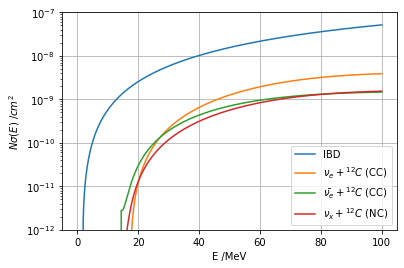

In [32]:
ax=plt.gca()
ax.plot(x,ibd,label='IBD')
ax.plot(x,cc_nue,label=r'$\nu_e+^{12} C$ (CC)')
ax.plot(x,cc_nuebar,label=r'$\bar{\nu_e}+^{12} C$ (CC)')
ax.plot(x,nc_nu,label=r'$\nu_x+^{12} C$ (NC)')

ax.set_yscale('log')
ax.set_xlabel('E /MeV')
ax.set_ylabel(r'$N \sigma (E)$ /$cm^2$')
ax.legend()
ax.set_ylim([1e-12,1e-7])
ax.grid('on')

plt.savefig('eff_crossections_LVD.png')

In [38]:
from snr import snr_yuksel
J1,J2,J3=snr_yuksel(0,'integrals','avg')

par_ebar=[5e+52*624151,6*3.15]

Ftot_ebar=J1*par_ebar[0]/par_ebar[1]

E0ebar=par_ebar[1]*J2/J1

A=(2+2.3)/(1+2.3)
k=J3*J1/J2**2
a=(2-k*A)/(k*A-1)

from spectra import spectrum_garching
f0=lambda E,Ftot,E0,a: spectrum_garching(E,Ftot*E0,E0,a)

f0ebar=lambda E: f0(E,Ftot_ebar,E0ebar,a)

In [39]:
x=np.linspace(0,100,1000)
y=np.array([])
for val in x:
    y=np.append(y,f0ebar(val))

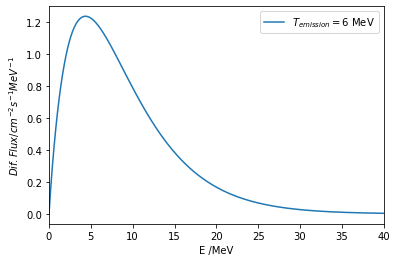

In [53]:
ax=plt.gca()
ax.plot(x,y,label=r'$T_{emission}=6$ MeV')

ax.set_ylabel(r'$Dif. Flux /cm^{-2}s^{-1}MeV^{-1}$')
ax.set_xlabel('E /MeV')
ax.legend()

plt.xticks(np.arange(0, 41, step=5))
ax.set_xlim([0,40])

plt.savefig('T6MeV_flux.png')